# project bonhomie ${t\bar{t}H}$ and ${t\bar{t}b\bar{b}}$ classification variables preparation

This notebook takes ROOT files of ${t\bar{t}H}$ and ${t\bar{t}b\bar{b}}$ samples, applies a selection, impudes some values and then exports the resulting data to CSV.

In [1]:
import datetime
import keras
from keras import activations
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model
from matplotlib import gridspec
import matplotlib.pylab as plt
from matplotlib.ticker import NullFormatter, NullLocator, MultipleLocator
import pandas as pd
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set(style = 'ticks')
sns.set_palette('husl')
import sqlite3
import talos as ta
from vis.visualization import visualize_activation
from vis.visualization import visualize_saliency
from vis.utils import utils
import warnings
warnings.filterwarnings("ignore")

import root_pandas

Using TensorFlow backend.


Welcome to JupyROOT 6.16/00


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [17, 14]

In [3]:
variables = [
    "nElectrons",
    "nMuons",
    "nJets",
    "nBTags_70",
    "dRbb_avg_Sort4",
    "dRbb_MaxPt_Sort4",
    "dEtajj_MaxdEta",
    "Mbb_MindR_Sort4",
    "Mjj_MindR",
    "nHiggsbb30_Sort4",
    "HT_jets",
    "dRlepbb_MindR_Sort4",
    "Aplanarity_jets",
    "H1_all",
    "TTHReco_best_TTHReco",
    "TTHReco_best_Higgs_mass",
    "TTHReco_best_Higgsbleptop_mass",
    "TTHReco_best_bbHiggs_dR",
    "TTHReco_withH_best_Higgsttbar_dR",
    "TTHReco_best_Higgsleptop_dR",
    "TTHReco_best_b1Higgsbhadtop_dR",
    "LHD_Discriminant"
]

filenames_ttH  = ["ttH_group.phys-higgs.11468583._000005.out.root"]
filenames_ttbb = ["ttbb_group.phys-higgs.11468624._000005.out.root"]
ttH            = root_pandas.read_root(filenames_ttH,  "nominal_Loose", columns = variables)
ttbb           = root_pandas.read_root(filenames_ttbb, "nominal_Loose", columns = variables)
ttH["classification"]   = 1
ttbb["classification"]  = 0

df = pd.concat([ttH, ttbb])
df.head()

,TTHReco_best_Higgsleptop_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_TTHReco,Aplanarity_jets,TTHReco_best_Higgs_mass,nMuons,dRbb_MaxPt_Sort4,Mbb_MindR_Sort4,H1_all,dEtajj_MaxdEta,LHD_Discriminant,TTHReco_best_b1Higgsbhadtop_dR,TTHReco_best_Higgsbleptop_mass,dRbb_avg_Sort4,nHiggsbb30_Sort4,dRlepbb_MindR_Sort4,Mjj_MindR,HT_jets,nJets,TTHReco_best_bbHiggs_dR,nElectrons,nBTags_70,classification
0,-9.000000,-9.000000,-9.000000,0.130797,-9.000000,1,1.095705,98896.421875,0.329154,1.215435,-9.000000,-9.000000,-9.000000,1.568611,6,2.636658,98896.421875,319676.18750,4,-9.000000,0,2,1
1,-9.000000,-9.000000,-9.000000,0.010764,-9.000000,0,1.873108,29691.271484,0.801864,1.611009,-9.000000,-9.000000,-9.000000,1.596763,2,1.926379,29691.271484,200475.96875,4,-9.000000,1,1,1
2,3.033175,2.914220,0.000834,0.027035,156656.203125,0,1.190597,57697.246094,0.525295,1.440214,0.429600,0.664401,360101.968750,2.093996,2,2.911004,57697.246094,520111.81250,6,1.190597,1,3,1
3,2.597709,2.975436,0.259733,0.173628,84131.101562,1,0.939390,31385.402344,0.305829,1.255129,0.681828,0.939390,142397.703125,1.416285,2,3.017599,22429.285156,436955.81250,7,1.155449,0,2,1
4,1.683739,3.803568,0.325758,0.053116,300187.250000,1,1.992145,127986.554688,0.026771,3.602055,0.725152,2.444624,397841.062500,2.251585,2,2.163189,28428.347656,838228.50000,9,2.963197,0,3,1


# selection

In [4]:
selection_ejets        = "(nElectrons == 1) & (nJets >= 4)"
selection_mujets       = "(nMuons == 1) & (nJets >= 4)"
selection_ejets_5JE4BI = "(nElectrons == 1) & (nJets == 4) & (nBTags_70 >= 4)"
selection_ejets_6JI4BI = "(nElectrons == 1) & (nJets == 6) & (nBTags_70 >= 4)"

df = df.query(selection_ejets)
df.drop(["nElectrons", "nMuons", "nJets", "nBTags_70"], axis = 1, inplace = True)
df.head()

,TTHReco_best_Higgsleptop_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_TTHReco,Aplanarity_jets,TTHReco_best_Higgs_mass,dRbb_MaxPt_Sort4,Mbb_MindR_Sort4,H1_all,dEtajj_MaxdEta,LHD_Discriminant,TTHReco_best_b1Higgsbhadtop_dR,TTHReco_best_Higgsbleptop_mass,dRbb_avg_Sort4,nHiggsbb30_Sort4,dRlepbb_MindR_Sort4,Mjj_MindR,HT_jets,TTHReco_best_bbHiggs_dR,classification
1,-9.000000,-9.000000,-9.000000,0.010764,-9.000000,1.873108,29691.271484,0.801864,1.611009,-9.000000,-9.000000,-9.000000,1.596763,2,1.926379,29691.271484,200475.96875,-9.000000,1
2,3.033175,2.914220,0.000834,0.027035,156656.203125,1.190597,57697.246094,0.525295,1.440214,0.429600,0.664401,360101.968750,2.093996,2,2.911004,57697.246094,520111.81250,1.190597,1
7,3.362126,2.896700,0.115693,0.065426,162454.687500,2.151490,41279.269531,0.707541,0.484865,0.398901,2.522366,226994.640625,1.869288,0,1.299827,30980.066406,417521.62500,3.028662,1
8,-9.000000,-9.000000,-9.000000,0.048023,-9.000000,0.880868,73485.015625,0.487572,1.895097,-9.000000,-9.000000,-9.000000,2.143145,3,2.155922,73485.015625,275745.00000,-9.000000,1
10,2.637625,2.656071,0.469479,0.289182,58203.132812,1.388736,59727.781250,0.162432,2.234762,0.599817,2.199806,129147.218750,1.998076,3,1.264251,62289.003906,562667.18750,1.378433,1


# imputation

In [5]:
df["TTHReco_best_TTHReco"].replace(            -9, -1, inplace = True)
df["TTHReco_best_Higgs_mass"].replace(         -9, -1, inplace = True)
df["TTHReco_best_Higgsbleptop_mass"].replace(  -9, -1, inplace = True)
df["TTHReco_best_bbHiggs_dR"].replace(         -9, -1, inplace = True)
df["TTHReco_withH_best_Higgsttbar_dR"].replace(-9, -1, inplace = True)
df["TTHReco_best_Higgsleptop_dR"].replace(     -9, -1, inplace = True)
df["TTHReco_best_b1Higgsbhadtop_dR"].replace(  -9, -1, inplace = True)
df["LHD_Discriminant"].replace(                -9, -1, inplace = True)

In [6]:
df.describe()

,TTHReco_best_Higgsleptop_dR,TTHReco_withH_best_Higgsttbar_dR,TTHReco_best_TTHReco,Aplanarity_jets,TTHReco_best_Higgs_mass,dRbb_MaxPt_Sort4,Mbb_MindR_Sort4,H1_all,dEtajj_MaxdEta,LHD_Discriminant,TTHReco_best_b1Higgsbhadtop_dR,TTHReco_best_Higgsbleptop_mass,dRbb_avg_Sort4,nHiggsbb30_Sort4,dRlepbb_MindR_Sort4,Mjj_MindR,HT_jets,TTHReco_best_bbHiggs_dR,classification
count,22795.000000,22795.000000,22795.000000,22795.000000,2.279500e+04,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,22795.000000,2.279500e+04,22795.000000,22795.000000,22795.000000,22795.000000,2.279500e+04,22795.000000,22795.000000
mean,0.117260,0.299788,-0.598278,0.067760,4.951536e+04,1.451095,86824.859375,0.279962,2.479362,-0.533183,-0.065145,9.673321e+04,2.226088,1.943102,2.370248,61021.921875,4.801456e+05,-0.044370,0.484843
std,1.750754,2.006094,0.608348,0.059832,1.064385e+05,0.748053,49518.226562,0.242526,0.951609,0.709938,1.490521,1.824337e+05,0.368794,1.203174,0.816604,33789.070312,2.458683e+05,1.517816,0.499781
min,-1.000000,-1.000000,-1.000000,0.000003,-1.000000e+00,0.398412,15413.406250,0.000143,0.083365,-1.000000,-1.000000,-1.000000e+00,0.698804,0.000000,0.030079,12646.538086,1.237376e+05,-1.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,0.023378,-1.000000e+00,0.888015,53577.630859,0.068373,1.754394,-1.000000,-1.000000,-1.000000e+00,1.987808,1.000000,1.787283,36803.949219,3.101001e+05,-1.000000,0.000000
50%,-1.000000,-1.000000,-1.000000,0.049758,-1.000000e+00,1.284208,77606.914062,0.212177,2.425563,-1.000000,-1.000000,-1.000000e+00,2.186747,2.000000,2.506663,52837.085938,4.207616e+05,-1.000000,0.000000
75%,1.849221,2.733427,0.186900,0.094328,7.594321e+04,1.828739,108256.335938,0.450326,3.160602,0.304238,1.090169,1.728645e+05,2.438210,3.000000,2.988669,77744.980469,5.813163e+05,1.166542,1.000000
max,8.141920,8.771186,0.680926,0.430375,1.969459e+06,4.934083,835265.937500,0.958105,4.987387,0.962763,5.336122,2.219734e+06,4.078454,6.000000,5.688145,730843.625000,2.740930e+06,5.293179,1.000000


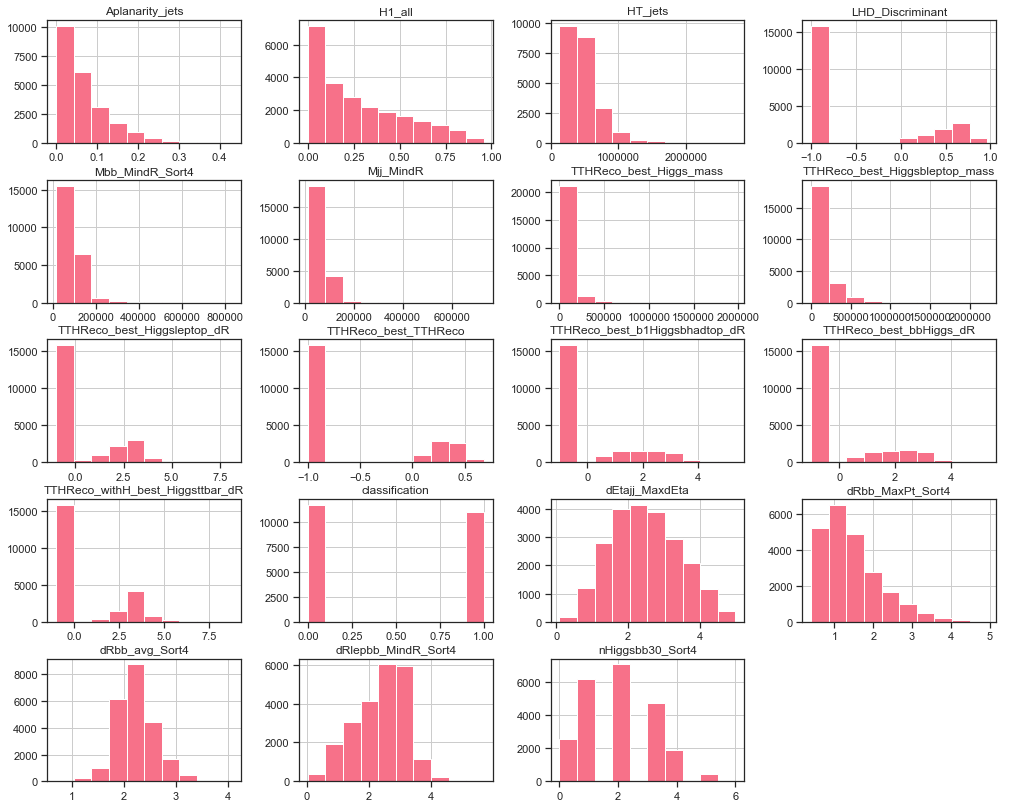

In [7]:
df.hist();

# clustered correlations ${t\bar{t}H}$

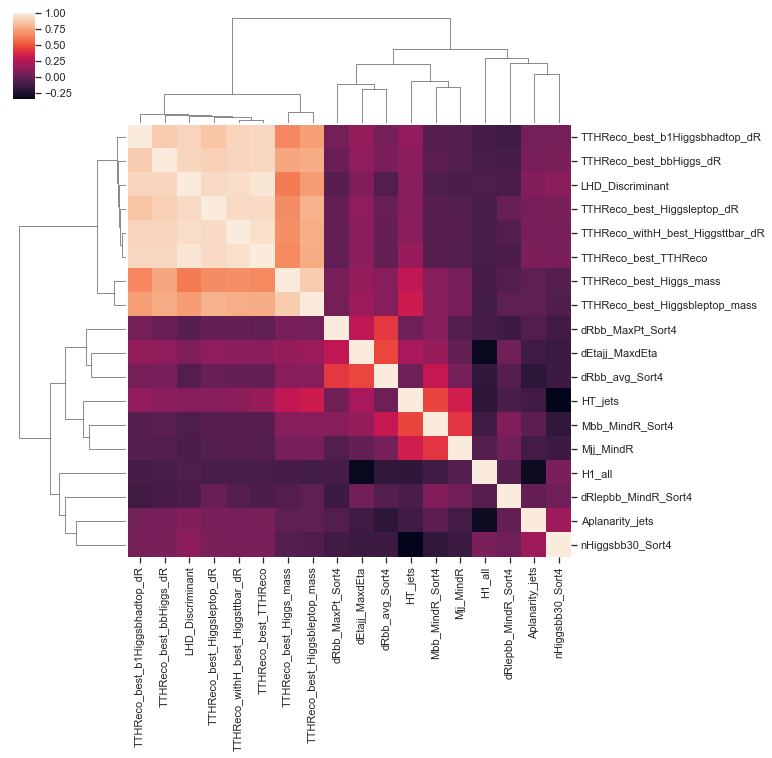

In [8]:
_df = df.query("classification == 1").drop("classification", axis = 1)
plot = sns.clustermap(_df.corr())
plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0);

# clustered correlations ${t\bar{t}b\bar{b}}$

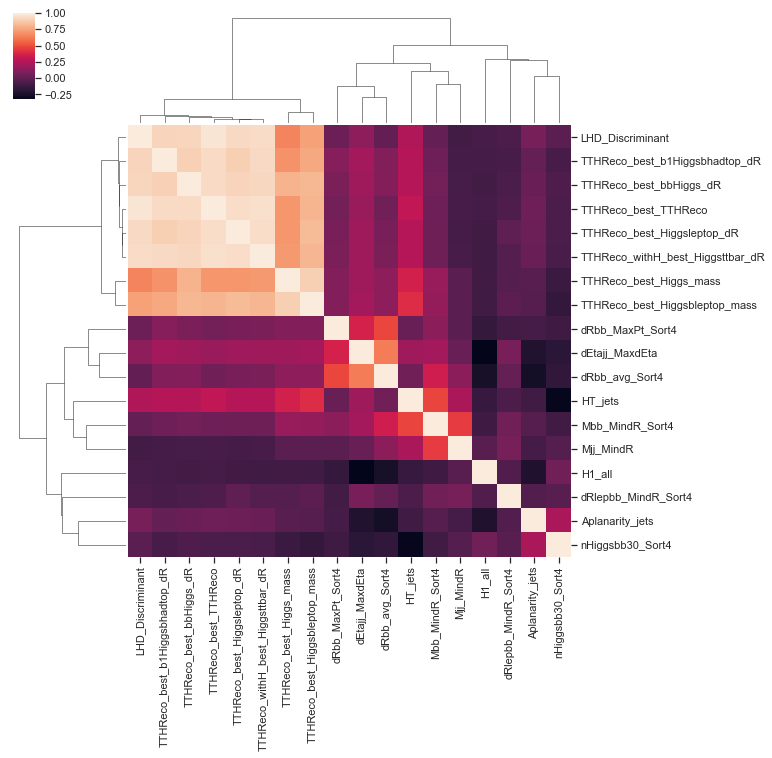

In [9]:
_df = df.query("classification == 0").drop("classification", axis = 1)
plot = sns.clustermap(_df.corr())
plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0);

# strongest absolute correlations with classifications

In [10]:
_df = df.corr()["classification"].abs().sort_values(ascending = False).to_frame()[1:]
_df

,classification
HT_jets,0.299185
dRbb_avg_Sort4,0.204813
LHD_Discriminant,0.203051
TTHReco_best_TTHReco,0.183604
TTHReco_withH_best_Higgsttbar_dR,0.154277
TTHReco_best_bbHiggs_dR,0.152960
TTHReco_best_Higgsleptop_dR,0.150482
TTHReco_best_b1Higgsbhadtop_dR,0.145891
TTHReco_best_Higgsbleptop_mass,0.126561
dRbb_MaxPt_Sort4,0.124450


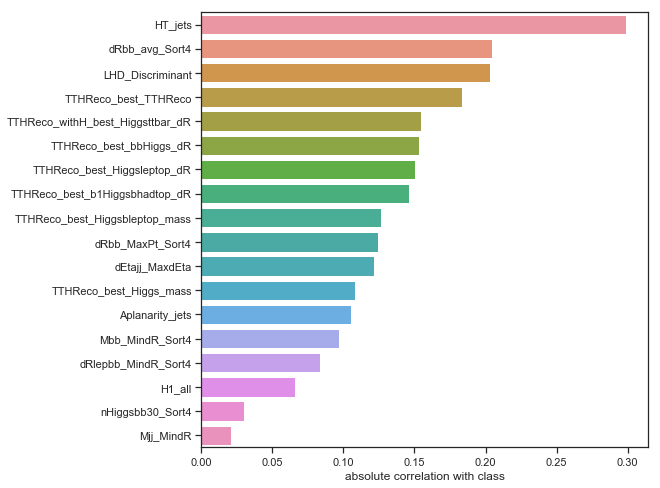

In [11]:
plt.rcParams["figure.figsize"] = [8, 8]
sns.barplot(_df["classification"], _df.index);
plt.xlabel('absolute correlation with class')
plt.show();

# rescale

In [12]:
if False:
    scaler = MinMaxScaler()
    variables_rescale     = [variable for variable in list(df.columns) if variable != "classification"]
    df[variables_rescale] = scaler.fit_transform(df[variables_rescale])
    df.head()

# save to CSV

In [13]:
df.to_csv("ttHbb_data.csv", index=False)